Based on Analysis of carbon in sediments using fast neutron activation
 analysis (FNAA)

In [10]:
from IPython.display import display, Math

latex_code = r"""
\chi^2 = \frac{\text{summ}^2}{\text{ch}_{\max} - \text{ch}_{\min} - 2}
\times \sum_{\text{ch}=\text{ch}_{\min}}^{\text{ch}_{\max}}
\frac{\left( a \cdot X(\text{ch}) + \frac{b}{\text{ch}} + c \frac{Y(\text{ch})}{\text{summ}} \right)^2}{\sigma^2 Y(\text{ch})}
"""

latex_constraints = r"""
\sum_{\text{ch}=\text{ch}_{\min}}^{\text{ch}_{\max}} X(\text{ch}) = 1; \quad
\sum_{\text{ch}=\text{ch}_{\min}}^{\text{ch}_{\max}} Y(\text{ch}) = \text{summ}
"""

display(Math(latex_code))
display(Math(latex_constraints))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
generator_path = '../data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']
detector_spectrums = spectrums

filenames_path = '../filenames.csv'
filenames = pd.read_csv(filenames_path)['name']

In [3]:
df = pd.DataFrame()
df['filename'] = filenames
df['detector'] = detector_spectrums[:, 0].tolist()
df

,filename,detector
0,tnm_c,"[0.00017666, 1.19e-07, 0.000105117, 6.0493e-05..."
1,tnm_si,"[0.000332717, 2.41e-07, 0.000197307, 0.0001127..."
2,tnm_al203,"[0.000292088, 2e-07, 0.000174911, 9.8536e-05, ..."
3,tnm_c50si50,"[0.000257817, 1.81e-07, 0.000152064, 8.6541e-0..."


In [4]:
def plott(spectrums, filenames, suptitle):
    fig, axs = plt.subplots(2, 2, figsize=(11, 10))
    fig.suptitle(suptitle)
    c_center = 4.44
    c_width = 0.15
    c_window = [c_center - c_width, c_center + c_width]
    c_maxs = []
    c_mins = []
    for i in range(len(spectrums)):
        axs[0, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        c_maxs.append(np.max(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        c_mins.append(np.min(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        # draw stem plots for spectrum
    axs[0, 1].legend()
    axs[0, 1].set_title('Carbon Window (Zoomed)')
    axs[0, 1].set_xlabel('MeV')
    axs[0, 1].set_ylabel('Intensity')
    axs[0, 1].set_xlim(c_center - c_width, c_center + c_width)
    axs[0, 1].set_ylim(np.min(c_mins), np.max(c_maxs))

    # Third subplot
    si_center = 1.78
    si_width = 0.15
    si_window = [si_center - si_width, si_center + si_width]
    si_maxs = []
    si_mins = []
    for i in range(len(spectrums)):
        axs[1, 0].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        si_maxs.append(np.max(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_mins.append(np.min(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
    axs[1, 0].legend()
    axs[1, 0].set_title('Silicone Window (Zoomed)')
    axs[1, 0].set_xlabel('MeV')
    axs[1, 0].set_ylabel('Intensity')
    axs[1, 0].set_xlim(si_center - si_width, si_center + si_width)
    axs[1, 0].set_ylim(np.min(si_mins), np.max(si_maxs))

    # Fourth subplot
    low_window = [0.1, 1]
    low_maxs = []
    low_mins = []
    for i in range(len(spectrums)):
        axs[1, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        low_maxs.append(np.max(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
        low_mins.append(np.min(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
    axs[1, 1].legend()
    axs[1, 1].set_title('Low Energy (Zoomed)')
    axs[1, 1].set_xlabel('MeV')
    axs[1, 1].set_ylabel('Intensity')
    axs[1, 1].set_xlim(low_window[0], low_window[1])
    axs[1, 1].set_ylim(np.min(low_mins), np.max(low_maxs))

    # First subplot
    for i in range(len(spectrums)):
        axs[0, 0].plot(bins, spectrums[i][0], label=filenames[i])
    axs[0, 0].legend()
    axs[0, 0].set_title('Spectrums')
    axs[0, 0].set_xlabel('MeV')
    axs[0, 0].set_ylabel('Intensity')
    # draw squares around the zoomed regions
    for ax in axs:
        for a in ax:
            a.add_patch(plt.Rectangle((0.1, np.min(low_mins)), 0.9, np.max(low_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((si_center - si_width, np.min(si_mins)), si_width*2, np.max(si_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((c_center - c_width, np.min(c_mins)), c_width*2, np.max(c_maxs), fill=None, edgecolor='red'))
    # label the zoomed regions
    axs[0, 0].text((low_window[0]+low_window[1])/2, np.max(low_maxs), 'Low Energy', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(c_center, np.max(c_maxs), 'Carbon', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(si_center, np.max(si_maxs), 'Silicone', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')

    # log_toggle = [True, True, True, True]
    log_toggle = [True, False, False, False]

    for i in range(log_toggle.__len__()):
        if log_toggle[i]:
            axs[i//2, i%2].set_yscale('log')

    # log scale
    plt.tight_layout()
    plt.show()


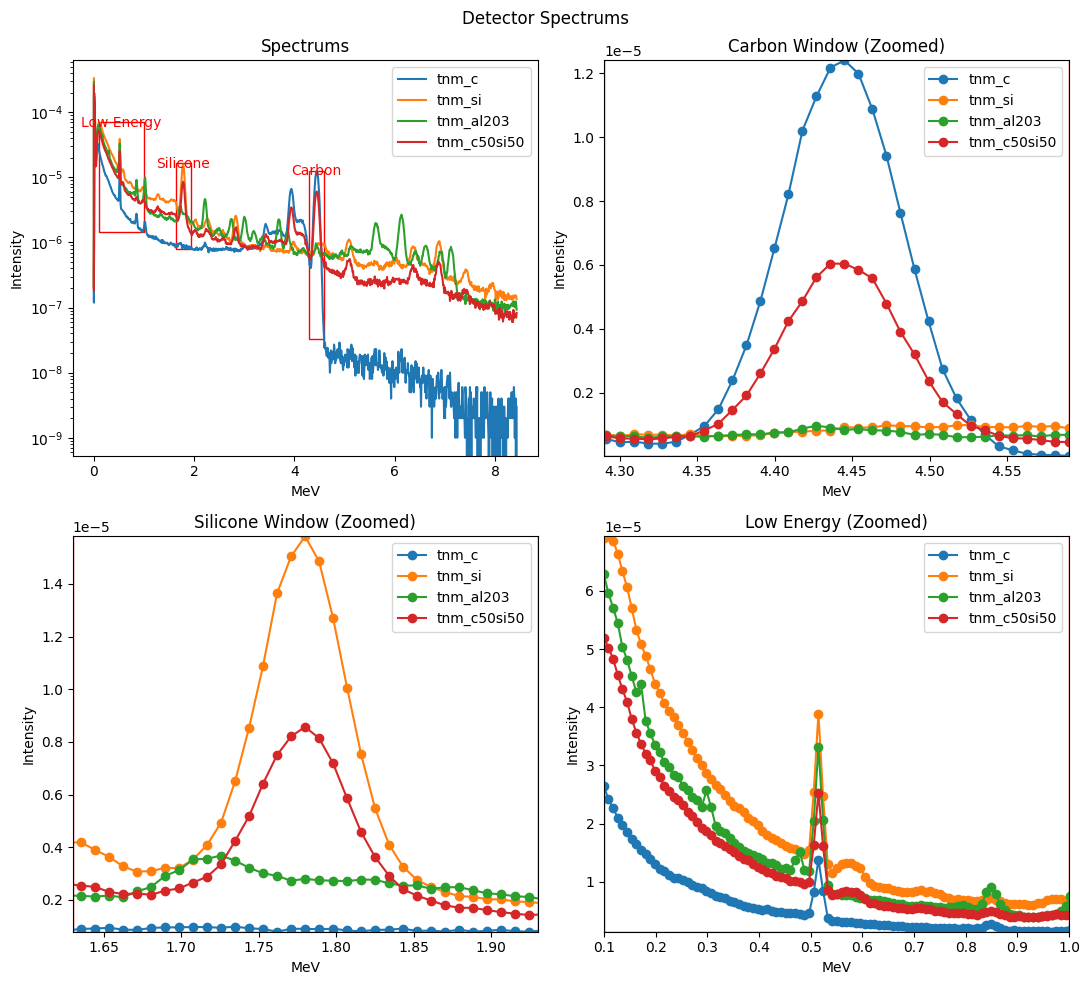

In [5]:
plott(detector_spectrums, filenames, 'Detector Spectrums')

bin count: 34
bin energy range: 4.30059 4.59873
ith bin range: 477 510


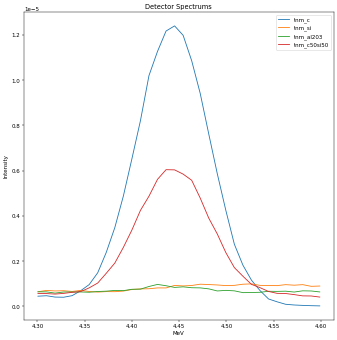

In [6]:
energy_min = 4.30
energy_max = 4.6
filtered_bins = bins[(bins > energy_min) & (bins < energy_max)]
ith_bin_min = np.where(bins == filtered_bins[0])[0][0]
ith_bin_max = np.where(bins == filtered_bins[-1])[0][0]
filtered_detector_spectrums = detector_spectrums[:, :, (bins > energy_min) & (bins < energy_max)]
# print bin counts and range
print('bin count:', filtered_bins.__len__())
print('bin energy range:', filtered_bins[0], filtered_bins[-1])
print('ith bin range:', ith_bin_min, ith_bin_max)
plt.figure(figsize=(10, 10), dpi=40)
for i in range(filtered_detector_spectrums.__len__()):
    plt.plot(filtered_bins, filtered_detector_spectrums[i][0], label=filenames[i])
plt.legend()
plt.title('Detector Spectrums')
plt.xlabel('MeV')
plt.ylabel('Intensity')
plt.show()


In [7]:
filenames

0          tnm_c
1         tnm_si
2      tnm_al203
3    tnm_c50si50
Name: name, dtype: object

In [8]:
carbon_spectrum = detector_spectrums[0][0]
minnn = np.min(carbon_spectrum)
filtered_carbon_spectrum = np.ones(carbon_spectrum.shape)*minnn
filtered_carbon_spectrum[ith_bin_min:ith_bin_max] = carbon_spectrum[ith_bin_min:ith_bin_max]
# make rest the min
# normalize between 0 and 1
filtered_carbon_spectrum = filtered_carbon_spectrum / np.max(filtered_carbon_spectrum)


In [11]:


def X(ch):
    return np.sum(filtered_carbon_spectrum[ch]) / np.sum(filtered_carbon_spectrum)

def Y(ch):
    return np.sum(detector_spectrums[3, 0, ch])

def summ(ch_min, ch_max):
    return np.sum(detector_spectrums[3, 0, ch_min:ch_max])

def fitting(ch, a, b, c):
    return a * X(ch) + b/ch + c

def chi2(a, b, c, sigma=1, fitting=fitting):
    ch_max = ith_bin_max
    ch_min = ith_bin_min
    summ_ = summ(ch_min, ch_max)
    chi2 = 0
    for ch in range(ch_min, ch_max):
        chi2 += (fitting(ch, a, b, c) - Y(ch)/summ_)**2 / (sigma**2 * Y(ch))
    chi2 /= (ch_max - ch_min - 2)
    chi2 *= summ_**2
    return chi2


In [16]:
# minimize chi2
from scipy.optimize import minimize

def chi2_minimize(params):
    a, b, c = params
    return chi2(a, b, c)

res = minimize(chi2_minimize, [0.5, 1, 1], method='Nelder-Mead', bounds=[(0, None), (0, None), (0, None)])
a, b, c = res.x
print('a:', a)
print('b:', b)
print('c:', c)
print('chi2:', chi2(a, b, c))

a: 0.8103792267635589
b: 2.7971503754656895
c: 0.0
chi2: 5.637615180883643e-09


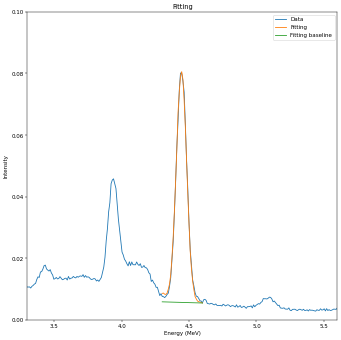

In [17]:
# plot the fitting
plt.figure(figsize=(10, 10), dpi=40)
plt.plot(bins, [Y(ch)/summ(ith_bin_min, ith_bin_max) for ch in range(len(bins))], label='Data')
plt.plot(filtered_bins, [fitting(ch, a, b, c) for ch in range(ith_bin_min, ith_bin_max + 1)], label='Fitting')
plt.plot(filtered_bins, [b/ch+c for ch in range(ith_bin_min, ith_bin_max + 1)], label='Fitting baseline')
plt.legend()
plt.title('Fitting')
plt.xlabel('Energy (MeV)')
plt.ylabel('Intensity')
plt.xlim(energy_min-1, energy_max+1)
plt.ylim(0, 0.1)
plt.show()